In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='dark', color_codes=True)


In [52]:
from sklearn.preprocessing import LabelEncoder


In [4]:
data = pd.read_csv("/content/customer-churn.csv")

In [7]:
data.head(10)

Account_Length  Voicemail_Message  Day_Minutes  ...  State  Area_Code     Phone
0              22                  0        207.7  ...     CT        408  345-2401
1             151                  0        175.3  ...     IL        408  386-5303
2              61                  0        267.1  ...     NE        408  420-8897
3               1                 26        208.0  ...     IA        408  331-2144
4             118                 42        148.7  ...     NM        415  372-8925
5             111                  0        123.1  ...     MD        510  372-8883
6              71                  0        243.7  ...     WY        415  409-7034
7              91                  0        151.8  ...     AL        408  348-9383
8             110                  0        131.9  ...     CO        510  345-8350
9             119                 16        147.2  ...     MA        408  417-3999

[10 rows x 21 columns]

The given problem is a classification problem where we have to determine whether the customer churns or not.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Account_Length         2499 non-null   int64  
 1   Voicemail_Message      2499 non-null   int64  
 2   Day_Minutes            2499 non-null   float64
 3   Evening_Minutes        2499 non-null   float64
 4   Night_Minutes          2499 non-null   float64
 5   International_Minutes  2499 non-null   float64
 6   CustomerService_Calls  2499 non-null   int64  
 7   Churn                  2499 non-null   object 
 8   International_Plan     2499 non-null   object 
 9   Voicemail_Plan         2499 non-null   object 
 10  Day_Calls              2499 non-null   int64  
 11  Day_Charge             2499 non-null   float64
 12  Evening_Calls          2499 non-null   int64  
 13  Evening_Charge         2499 non-null   float64
 14  Night_Calls            2499 non-null   int64  
 15  Nigh

Above info shows:
* There are 21 features including the target feature.
* The dataset has no missing values.
* There are 5 categorical data:
    * Churn(label for this classification task)
    * International_Plan
    * Voicemail_Plan
    * State
    * Phone

* Ther are 16 numerical values 8(float) and 8(int)

In [17]:
data.isnull().sum()

Account_Length           0
Voicemail_Message        0
Day_Minutes              0
Evening_Minutes          0
Night_Minutes            0
International_Minutes    0
CustomerService_Calls    0
Churn                    0
International_Plan       0
Voicemail_Plan           0
Day_Calls                0
Day_Charge               0
Evening_Calls            0
Evening_Charge           0
Night_Calls              0
Night_Charge             0
International_Calls      0
International_Charge     0
State                    0
Area_Code                0
Phone                    0
dtype: int64

In [9]:
data.describe()

Account_Length  Voicemail_Message  ...  International_Charge    Area_Code
count     2499.000000        2499.000000  ...           2499.000000  2499.000000
mean       101.167667           8.046819  ...              2.763938   436.960784
std         39.660896          13.631510  ...              0.750797    42.195085
min          1.000000           0.000000  ...              0.000000   408.000000
25%         74.000000           0.000000  ...              2.300000   415.000000
50%        101.000000           0.000000  ...              2.780000   415.000000
75%        127.000000          19.000000  ...              3.240000   415.000000
max        232.000000          51.000000  ...              5.400000   510.000000

[8 rows x 16 columns]

The values in each of these columns along with their mean doesnt seems to be overshooting.

## Visualisation


In [140]:
# data.hist()
# plt.show()

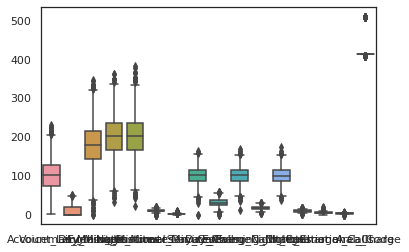

In [14]:
sns.boxplot(data = data)

Text(0, 0.5, 'Number of customers')

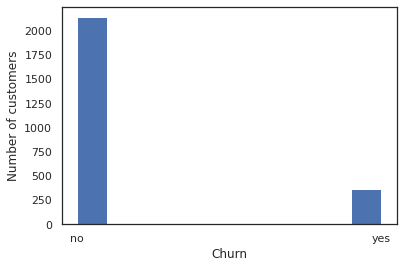

In [15]:
plt.hist(data['Churn'])
plt.xlabel('Churn')
plt.ylabel('Number of customers')

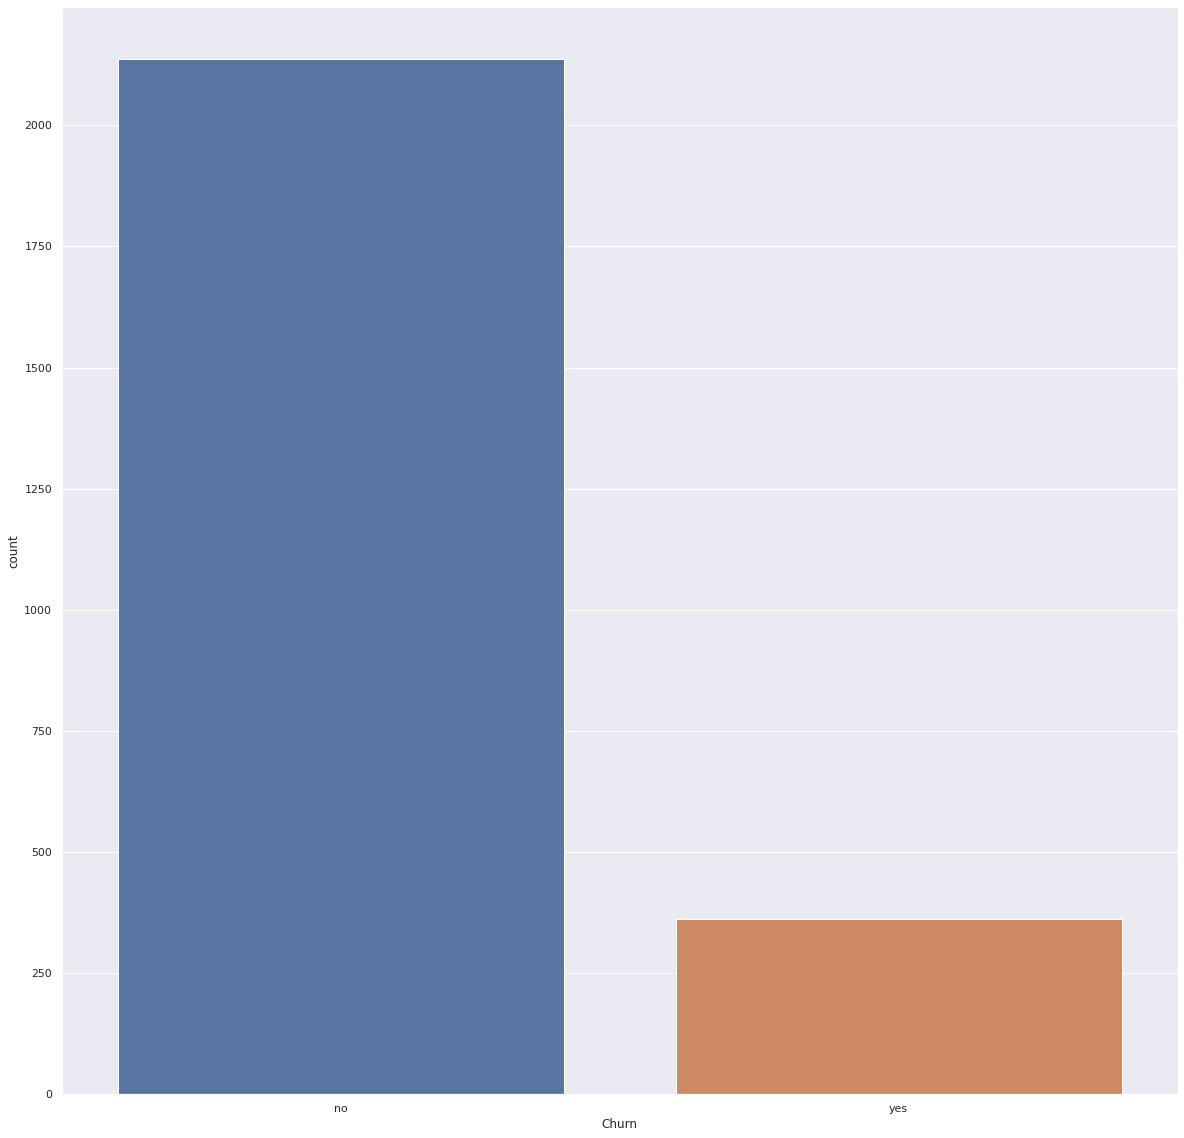

In [76]:
sns.countplot(x='Churn',data=data)

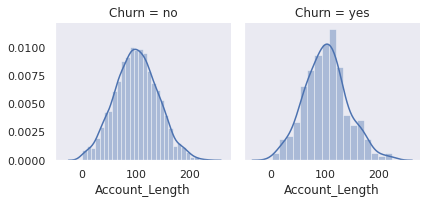

In [40]:
sns.FacetGrid(data, col = "Churn").map(sns.distplot,"Account_Length")

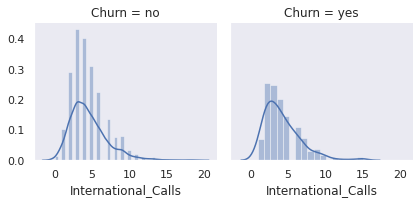

In [39]:
sns.FacetGrid(data, col = "Churn").map(sns.distplot,"International_Calls")

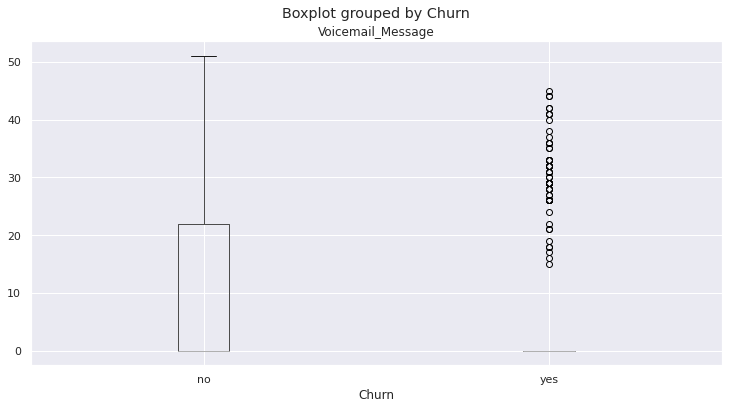

In [38]:
data.boxplot(column = ['Voicemail_Message'],by = "Churn", figsize = (12,6))

There are lot of outliers in yes value of churn.


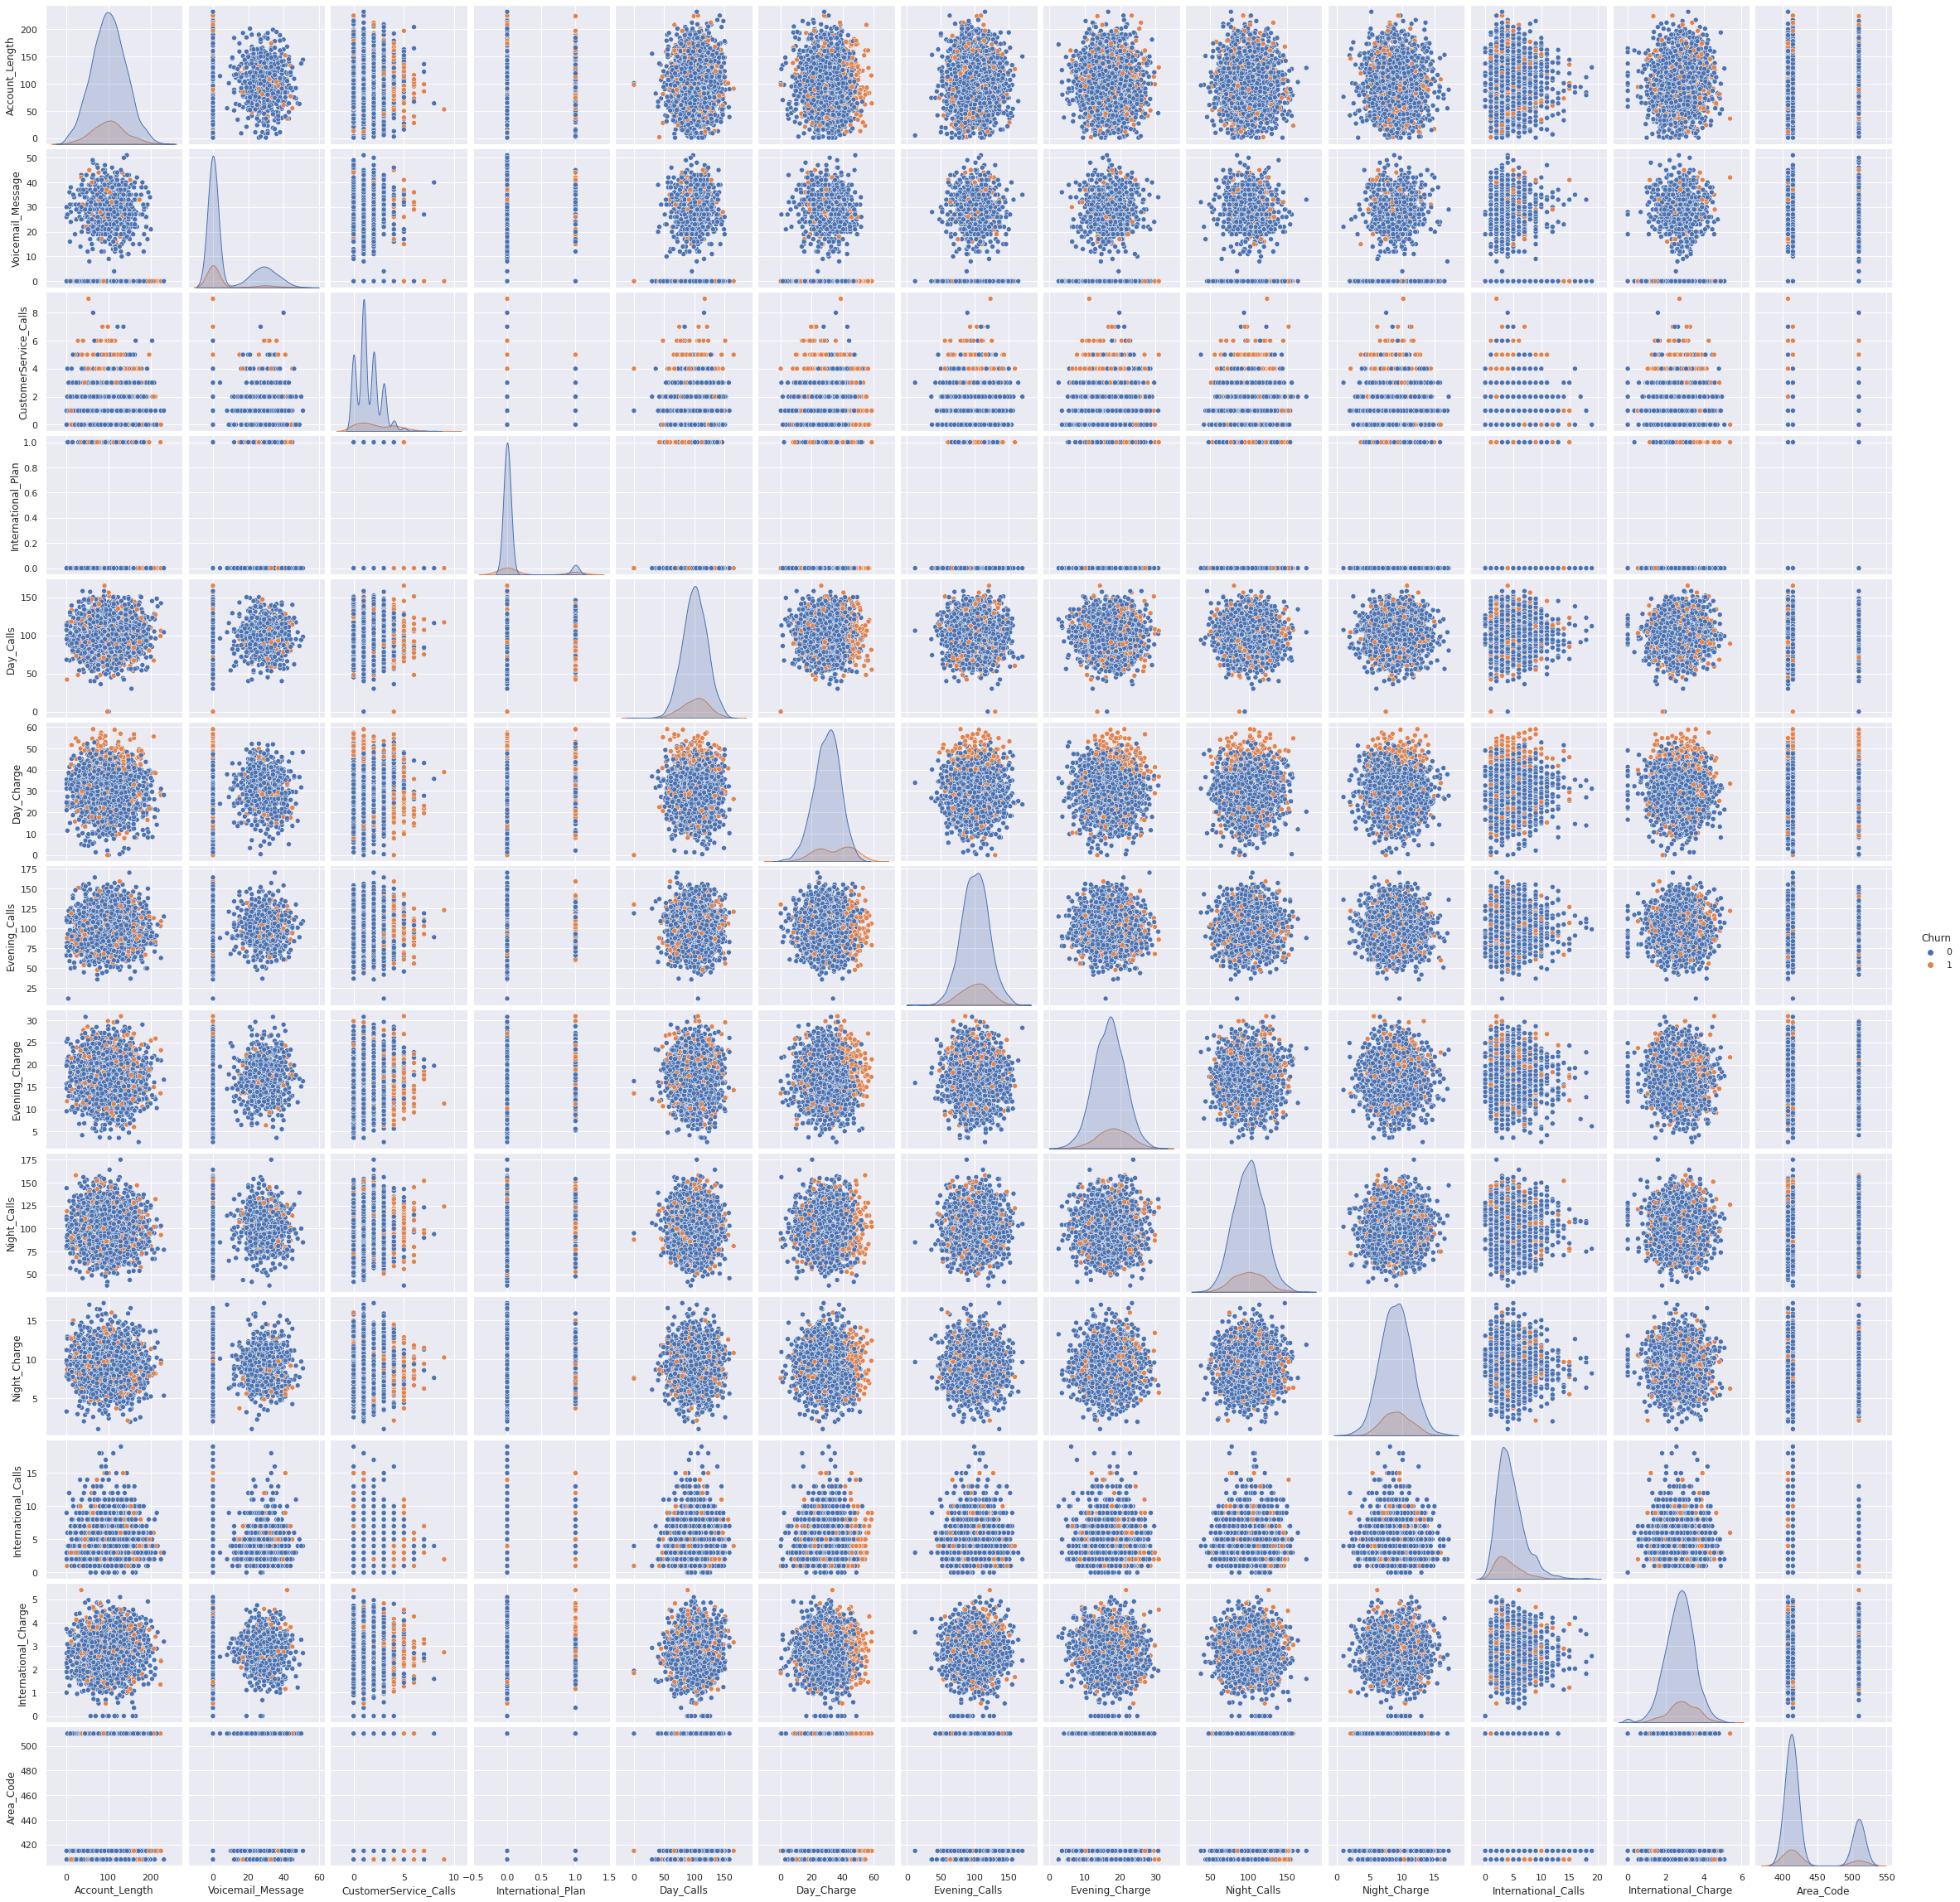

In [138]:
sns.pairplot(data, hue ="Churn")

# Feature Engineering


In [44]:
# categorical features
[col for col in data.columns.tolist() if data[col].dtype=='object']

['Churn', 'International_Plan', 'Voicemail_Plan', 'State', 'Phone']

In [46]:
data["State"].value_counts

<bound method IndexOpsMixin.value_counts of 0       CT
1       IL
2       NE
3       IA
4       NM
        ..
2494    ID
2495    MA
2496    IA
2497    OH
2498    NM
Name: State, Length: 2499, dtype: object>

In [47]:
data["State"].unique()

array(['CT', 'IL', 'NE', 'IA', 'NM', 'MD', 'WY', 'AL', 'CO', 'MA', 'RI',
       'NY', 'VT', 'MI', 'NC', 'OH', 'DC', 'AZ', 'OR', 'KY', 'ND', 'WV',
       'CA', 'IN', 'DE', 'TX', 'FL', 'ME', 'WI', 'MO', 'NH', 'NJ', 'NV',
       'AK', 'SD', 'KS', 'TN', 'MN', 'GA', 'VA', 'AR', 'HI', 'SC', 'UT',
       'ID', 'WA', 'PA', 'MS', 'OK', 'LA', 'MT'], dtype=object)

Removing **State** as it has lots of unique value and removing **Phone** as it is irrelevant in determining target prediction.


In [48]:
df = data.drop(["State", "Phone"], axis = 1)
df.columns

Index(['Account_Length', 'Voicemail_Message', 'Day_Minutes', 'Evening_Minutes',
       'Night_Minutes', 'International_Minutes', 'CustomerService_Calls',
       'Churn', 'International_Plan', 'Voicemail_Plan', 'Day_Calls',
       'Day_Charge', 'Evening_Calls', 'Evening_Charge', 'Night_Calls',
       'Night_Charge', 'International_Calls', 'International_Charge',
       'Area_Code'],
      dtype='object')

In [50]:
categorical = [col for col in df.columns.tolist() if df[col].dtype=='object']
print(categorical)

['Churn', 'International_Plan', 'Voicemail_Plan']


In [51]:
# determining what kind of encoding to use for remaining categorical data
print(df['International_Plan'].unique())
print(df['Voicemail_Plan'].unique())
print(df['Churn'].unique())

['no' 'yes']
['no' 'yes']
['no' 'yes']


- All of them have two unique values, **yes** or **no** and they are nominial data. Instead of using one-hot encoding which is recommended for nominial data which adds extra column,
We will be using label encoding where:

  *   1 == yes
  *   0 == no




In [53]:
# Binary Arribute encoding

binary_values = ['yes','no']
binary_encoder = LabelEncoder()
binary_encoder.fit(binary_values)

for attrib in categorical:
    df[attrib] = binary_encoder.transform(df[attrib])


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Account_Length         2499 non-null   int64  
 1   Voicemail_Message      2499 non-null   int64  
 2   Day_Minutes            2499 non-null   float64
 3   Evening_Minutes        2499 non-null   float64
 4   Night_Minutes          2499 non-null   float64
 5   International_Minutes  2499 non-null   float64
 6   CustomerService_Calls  2499 non-null   int64  
 7   Churn                  2499 non-null   int64  
 8   International_Plan     2499 non-null   int64  
 9   Voicemail_Plan         2499 non-null   int64  
 10  Day_Calls              2499 non-null   int64  
 11  Day_Charge             2499 non-null   float64
 12  Evening_Calls          2499 non-null   int64  
 13  Evening_Charge         2499 non-null   float64
 14  Night_Calls            2499 non-null   int64  
 15  Nigh

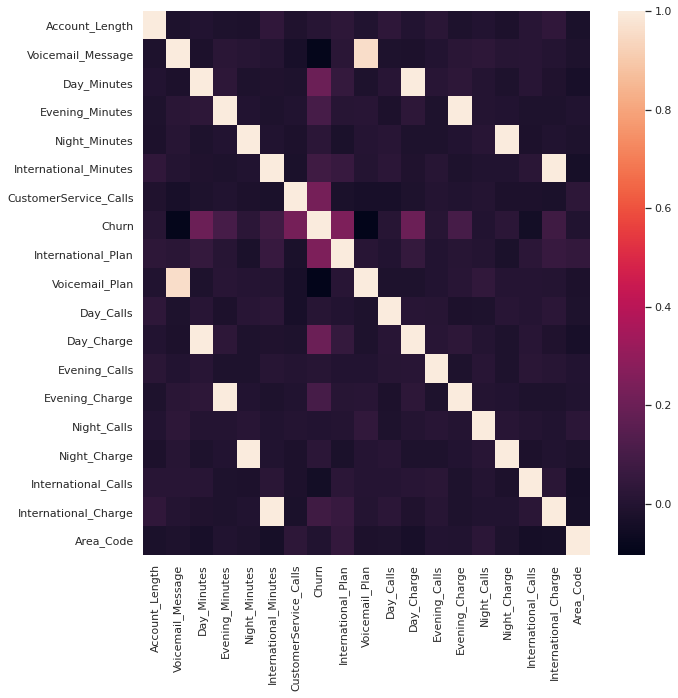

In [57]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr)

From above plot we can clearly see the **Multi-Colinearity Property** between features like:

1. Voice mail plan - voicemail message
2. Day Charge - Day Minutes
3. Evening Minutes - Evening Charge
4. Night Minutes - Night Charge
5. International Minutes - International Charge


Keeping only the later features.


In [58]:
features_remove = ["International_Minutes", "Evening_Minutes", "Night_Minutes", "Day_Minutes","Voicemail_Plan"]

In [60]:
df = df.drop(features_remove, axis = 1)

In [61]:
df.columns

Index(['Account_Length', 'Voicemail_Message', 'CustomerService_Calls', 'Churn',
       'International_Plan', 'Day_Calls', 'Day_Charge', 'Evening_Calls',
       'Evening_Charge', 'Night_Calls', 'Night_Charge', 'International_Calls',
       'International_Charge', 'Area_Code'],
      dtype='object')

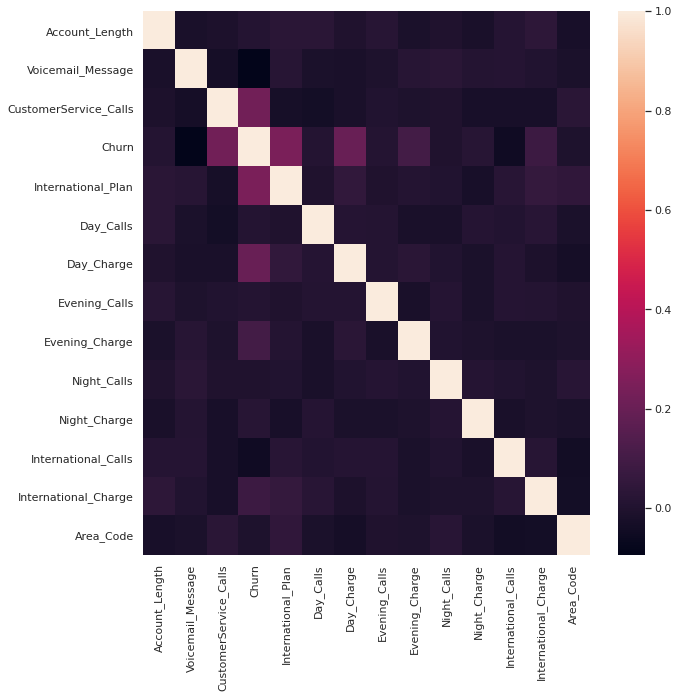

In [62]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr)

In [63]:
corr.sort_values(by=["Churn"])["Churn"]

Voicemail_Message       -0.093346
International_Calls     -0.046784
Area_Code               -0.004495
Night_Calls             -0.000530
Day_Calls                0.011319
Account_Length           0.011793
Evening_Calls            0.011983
Night_Charge             0.021886
International_Charge     0.078601
Evening_Charge           0.102605
Day_Charge               0.199329
CustomerService_Calls    0.226535
International_Plan       0.247652
Churn                    1.000000
Name: Churn, dtype: float64

In [83]:
# to confirm whether the data is imbalance
df['Churn'].value_counts()

0    2137
1     362
Name: Churn, dtype: int64

Dataset is imbalance.
There are various ways of handling imbalance data.
1. Use the right evaluation metrics
	  * Precision/Specificity: how many selected instances are relevant.
		* Recall/Sensitivity: how many relevant instances are selected.
		* F1 score: harmonic mean of precision and recall.
		* MCC: correlation coefficient between the observed and predicted binary classifications.
		* AUC: relation between true-positive rate and false positive rate.
		
2. Resampling
	 - Under-sampling
	 - Over-sampling using SMOTE


# Model Building


In [84]:
from sklearn.model_selection import train_test_split 
RANDOM_STATE = 42
data = df
X=data.drop('Churn',axis=1)
y=data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify = data["Churn"],random_state=RANDOM_STATE)
print(X_train.shape)
print(X_test.shape)

(1749, 13)
(750, 13)


#### Upsampling using SMOTE (Synthetic Minority Over-sampling Technique)

In [86]:
from imblearn.over_sampling import SMOTE
sm = SMOTE ()

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
X_test_SMOTE, y_test_SMOTe = sm.fit_resample(X_test, y_test)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

ESTIMATORS = 100
RANDOM_STATE = 7
ALPHA = 0.7

models = {"lr":LogisticRegression(),
          "svm": svm.SVC(),
          "dt":DecisionTreeClassifier(random_state=RANDOM_STATE),
          "knn": KNeighborsClassifier(),
          "bagging":BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
                        n_estimators=ESTIMATORS, random_state=RANDOM_STATE),
          "rf": RandomForestClassifier(n_estimators=ESTIMATORS, random_state=RANDOM_STATE),
          "xgboost": XGBClassifier(random_state = RANDOM_STATE),
          "gboost": GradientBoostingClassifier(n_estimators=ESTIMATORS, learning_rate=ALPHA,max_depth=1, random_state=RANDOM_STATE),
          "GNB": GaussianNB()}

In [114]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score

highest_f1 = 0
fitted_models = []
model_predictions = {}

for name, model in models.items():
  
  fitted_model = model.fit(X_train_SMOTE, y_train_SMOTE)

  prediction = model.predict(X_test_SMOTE)

  model_predictions[name]=prediction

  fitted_models.append(fitted_model)
  f1_score_value = f1_score(prediction, y_test_SMOTe)

  if f1_score_value > highest_f1:
    highest_f1 = f1_score_value
    best_model = fitted_model

  print(name)
  print("Accuracy: {}".format(accuracy_score(prediction, y_test_SMOTe)))
  print("Confusion Matrix: \n{}".format(confusion_matrix(prediction, y_test_SMOTe)))
  print("F1 Score: {}".format(f1_score(prediction, y_test_SMOTe)))
  print("--------------\n")
 


lr
Accuracy: 0.733229329173167
Confusion Matrix: 
[[469 170]
 [172 471]]
F1 Score: 0.733644859813084
--------------

svm
Accuracy: 0.6193447737909517
Confusion Matrix: 
[[359 206]
 [282 435]]
F1 Score: 0.6406480117820325
--------------

dt
Accuracy: 0.890795631825273
Confusion Matrix: 
[[587  86]
 [ 54 555]]
F1 Score: 0.888
--------------

knn
Accuracy: 0.5600624024960998
Confusion Matrix: 
[[417 340]
 [224 301]]
F1 Score: 0.516295025728988
--------------

bagging
Accuracy: 0.890015600624025
Confusion Matrix: 
[[610 110]
 [ 31 531]]
F1 Score: 0.8827930174563592
--------------

rf
Accuracy: 0.9017160686427457
Confusion Matrix: 
[[616 101]
 [ 25 540]]
F1 Score: 0.8955223880597014
--------------

xgboost
Accuracy: 0.9407176287051482
Confusion Matrix: 
[[621  56]
 [ 20 585]]
F1 Score: 0.9390048154093098
--------------

gboost
Accuracy: 0.8876755070202809
Confusion Matrix: 
[[590  93]
 [ 51 548]]
F1 Score: 0.8838709677419355
--------------

GNB
Accuracy: 0.780811232449298
Confusion Matrix: 

The F1 score model is preferred more than accuracy as it calculates the harmonic mean of precision and recall as the dataset is unbalanced, the accuracy cannot be a proper metric.

Here, XGBoost attains the highest F1 Score of 0.939.



In [116]:
import pickle
pickle.dump(best_model,open("customer_churn_prediction.pkl","wb"))

In [119]:
df.iloc[0]

Account_Length            22.00
Voicemail_Message          0.00
CustomerService_Calls      0.00
Churn                      0.00
International_Plan         0.00
Day_Calls                116.00
Day_Charge                35.31
Evening_Calls             99.00
Evening_Charge            17.90
Night_Calls               88.00
Night_Charge              10.72
International_Calls        5.00
International_Charge       2.59
Area_Code                408.00
Name: 0, dtype: float64

In [120]:
X_test_SMOTE[0]

array([ 39.  ,  36.  ,   1.  ,   0.  , 121.  ,  24.09, 113.  ,  19.75,
       131.  ,   9.99,   5.  ,   3.24, 415.  ])

In [122]:
best_model.predict([[ 39.  ,  36.  ,   1.  ,   0.  , 121.  ,  24.09, 113.  ,  19.75, 131.  ,   9.99,   5.  ,   3.24, 415.  ] ])

array([0])

In [130]:
df.iloc[2]

Account_Length            61.00
Voicemail_Message          0.00
CustomerService_Calls      1.00
Churn                      1.00
International_Plan         0.00
Day_Calls                104.00
Day_Charge                45.41
Evening_Calls            131.00
Evening_Charge            15.33
Night_Calls              106.00
Night_Charge              10.38
International_Calls        4.00
International_Charge       4.67
Area_Code                408.00
Name: 2, dtype: float64

In [131]:
best_model.predict([[ 61.  ,  0.  ,   1.  ,   0.  , 104.  ,   45, 131.  ,  15 , 106.  ,  10.38,   4.  ,   4.67, 408.  ] ])

array([1])

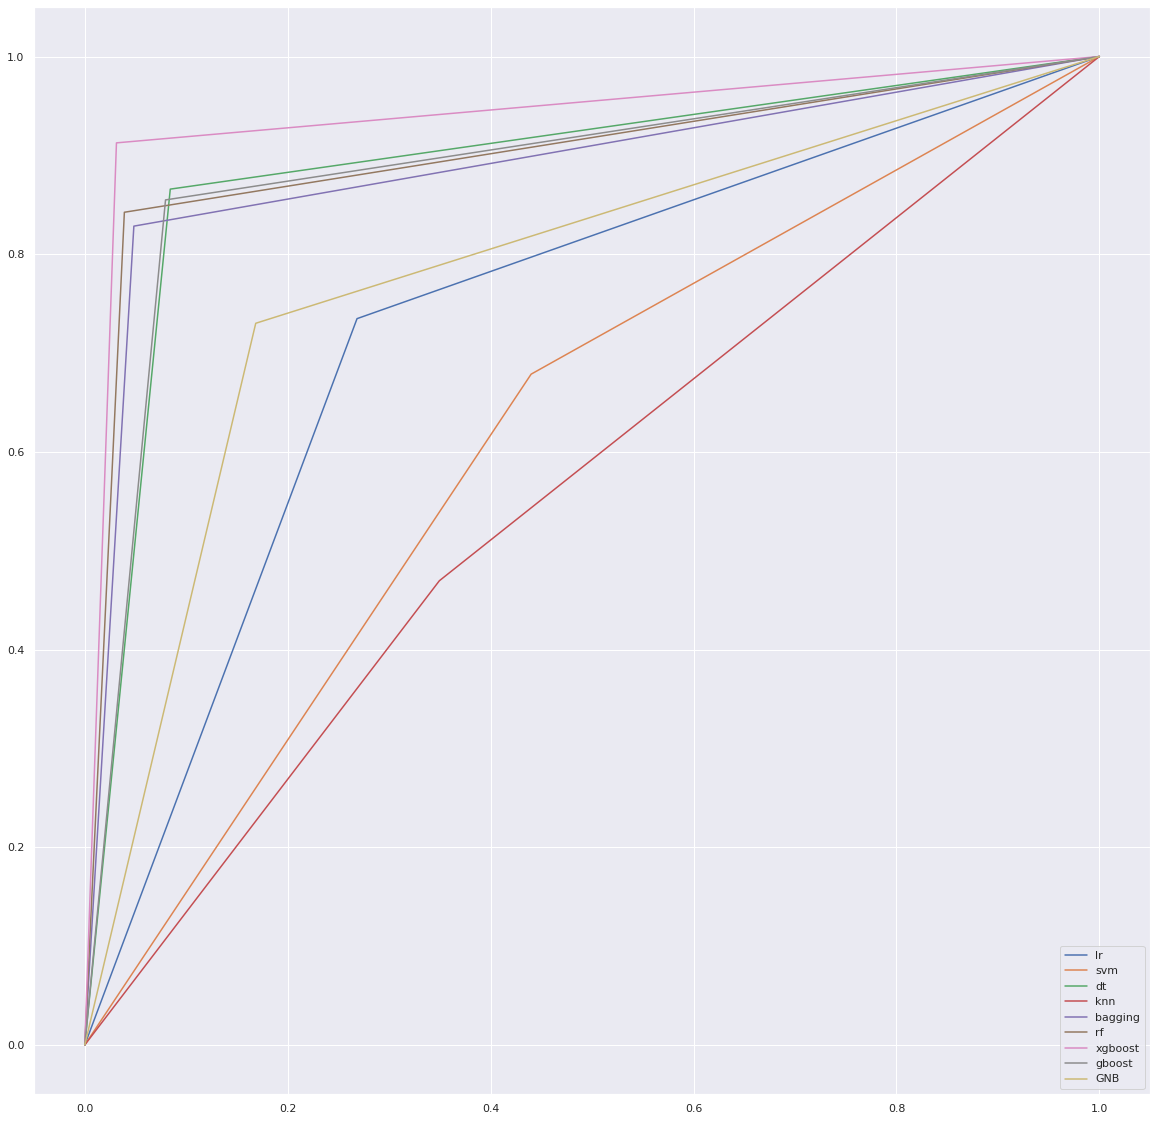

In [132]:
from sklearn import metrics
import matplotlib.pyplot as plt

for model, prediction in model_predictions.items():
  fpr, tpr, _ = metrics.roc_curve(y_test_SMOTe, prediction)
  auc = metrics.roc_auc_score(y_test_SMOTe, prediction)
  plt.plot(fpr,tpr,label="{}".format(model))
  plt.legend(loc=4)
plt.show()

# Model interpretation

In [134]:

!pip install shap


     |████████████████████████████████| 358kB 5.2MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491624 sha256=246ddb1d679aa90333a17bcdf111c6b384a99bd05ef83b6ef726763c788f2479
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


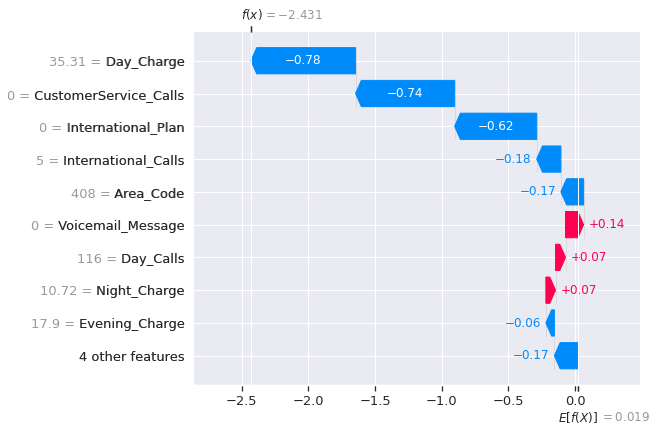

In [135]:
import xgboost
import shap


# explain the model's predictions using SHAP
explainer = shap.Explainer(best_model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. 

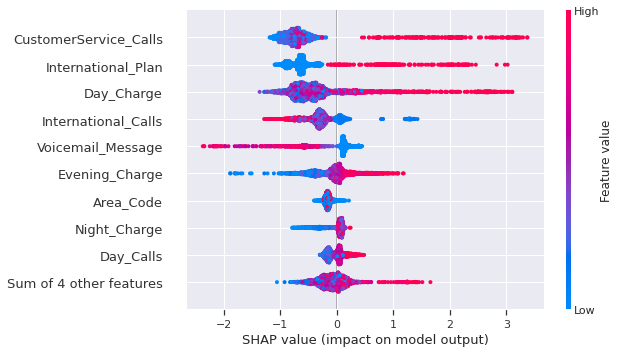

In [136]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

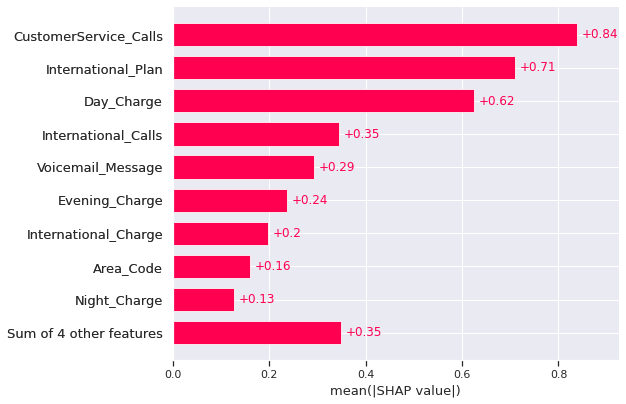

In [137]:
shap.plots.bar(shap_values)


In [139]:
print(xgboost.__version__)

0.90
